# **Lab - 6**

**ID:** 180041120

**Course Code:** 4734

**Course Name:** Digital Image Processing Lab

In [5]:
#Importing the necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
def freq_dom_filter(image, cut_off_freq = 20, mode = 'li', order = 1):
    frequency_domain_image = np.fft.fft2(image)       #Transforming the image to frequency domain
    shifted_frequency_domain_image = np.fft.fftshift(frequency_domain_image) #Shifting the frequency domain image
    height, width = shifted_frequency_domain_image.shape 

    filter = np.zeros(image.shape)

    for i in range(height):
        for j in range(width):
          distance = np.sqrt((i-height/2.0)*(i-height/2.0) + (j-width/2.0)*(j-width/2.0)) #Calculating the distance from center
          if distance == 0:     #To avoid division by zero, we set the zero distance equal to 0.01
            distance = 1e-2
          if mode == 'li':      #Ideal Low Pass Filter
            if cut_off_freq >= distance:
              filter[i][j] = 1
          if mode == 'lb':      #Butterworth Low Pass Filter
              filter[i][j] = 1.0/(1.0+((distance/cut_off_freq)**(2.0*order)))
          if mode == 'lg':      #Gaussian Low Pass Filter
              filter[i][j]= np.exp(-(distance*distance)/(2.0*cut_off_freq*cut_off_freq))
          
          if mode == 'hi':      #Ideal High Pass Filter
            if cut_off_freq <= distance:
              filter[i][j] = 1
          if mode == 'hb':      #Butterworth High Pass Filter
              filter[i][j] = 1.0/(1.0+((cut_off_freq/distance)**(2.0*order)))
          if mode == 'hg':      #Gaussian High Pass Filter
              filter[i][j]= 1 - np.exp(-(distance*distance)/(2.0*cut_off_freq*cut_off_freq)) 

    filtered_frequency_domain_image = shifted_frequency_domain_image*filter   #Elementwise multiplication of image in frequency domain with the filter
    filtered_spatial_domain_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_frequency_domain_image)))   #Shifting back the signal, and then performing inverse fft and taking the absolute value
    return filtered_spatial_domain_image

**Explanation:** We use a single function that will perform all six filtering operations. To pick a specific filter operation, the parameter `mode` needs to be changed. The explanation of the modes is given below:

*   li - Lowpass , Ideal
*   lb - Lowpass, Butterworth
*   lg - Lowpass, Gaussian
*   hi - Highpass, Ideal
*   hb - Highpass, Butterworth
*   hg - Highpass, Gaussian

The implementation is very straightforward - we first take the image in the frequency domain using a built-in fft function from numpy, and shift it using a builtin frequency domain shifting function. Afterward, we construct the filter by first initializing the filter with an array of zeros of size equal to that of the image, then filling filter values by looping over every pixel of the filter and calculating the distance from the center pixel. Every filter has its own formula for the value at a particular pixel, and using these formulae, we fill the filter values. Afterward, we perform element-wise multiplication with our shifted frequency domain image and the frequency domain filter. The output is then transformed to the spatial domain by first shifting the signal back and then using the inverse fft function. Finally, the spatial domain output is returned.


In [7]:
image = cv2.imread('/content/Fig0441(a)(characters_test_pattern).tif',0)

In [8]:
img_array = np.array(image)
low_ideal_img = freq_dom_filter(img_array)
low_butter_img = freq_dom_filter(img_array, cut_off_freq = 20, order = 2, mode = 'lb')
low_gauss_img = freq_dom_filter(img_array, cut_off_freq = 20,  mode = 'lg')
high_ideal_img = freq_dom_filter(img_array, mode = 'hi')
high_butter_img = freq_dom_filter(img_array, cut_off_freq = 20, order = 2, mode = 'hb')
high_gauss_img = freq_dom_filter(img_array, cut_off_freq = 20,  mode = 'hg')

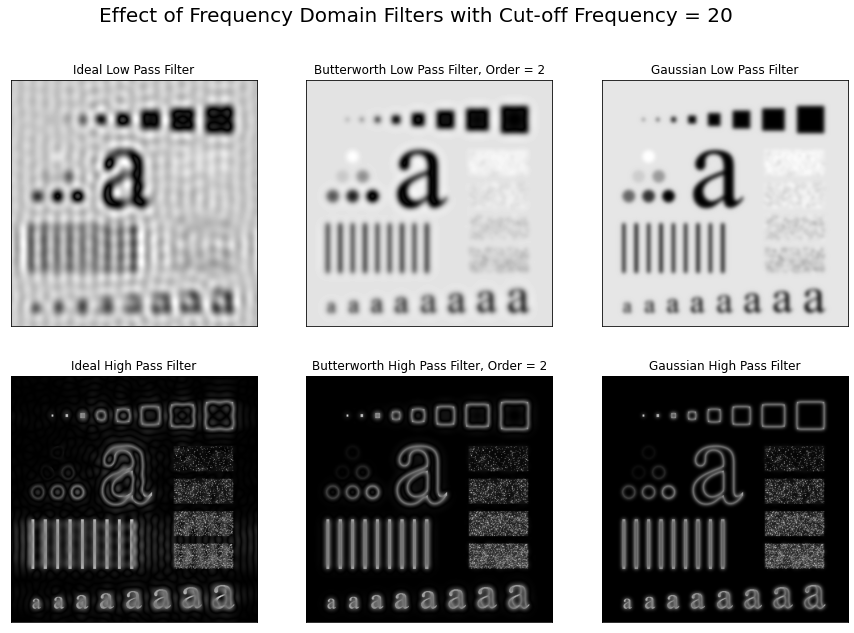

In [9]:
fig, ax = plt.subplots(2,3, figsize=(15,10))

ax[0][0].imshow(low_ideal_img, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Ideal Low Pass Filter')

ax[0][1].imshow(low_butter_img, cmap = 'gray')
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('Butterworth Low Pass Filter, Order = 2')

ax[0][2].imshow(low_gauss_img, cmap = 'gray')
ax[0][2].xaxis.set_ticks([])
ax[0][2].yaxis.set_ticks([])
ax[0][2].title.set_text('Gaussian Low Pass Filter')

ax[1][0].imshow(high_ideal_img, cmap = 'gray')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('Ideal High Pass Filter')

ax[1][1].imshow(high_butter_img, cmap = 'gray')
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('Butterworth High Pass Filter, Order = 2')

ax[1][2].imshow(high_gauss_img, cmap = 'gray')
ax[1][2].xaxis.set_ticks([])
ax[1][2].yaxis.set_ticks([])
ax[1][2].title.set_text('Gaussian High Pass Filter')

fig.suptitle('Effect of Frequency Domain Filters with Cut-off Frequency = 20', fontsize=20)
plt.show()

**Explanation:** The effect of various filters at cut-off frequency 20 is seen. Ideal filters are seen to have the highest ringing effect followed by Butterworth and Gaussian filters. The ringing effect and blurring of Gaussian and Butterworth are similar but Gaussian has slightly less ringing effect and seems to be the most preferable filter among the 3. However, the butterworth has a parameter called order which is set to 2, and can be tuned to get the desired effect.


The reason why ideal filters have such high ringing effect is that, ideal filters have a sharp transition for cutting off the frequencies while the other two filters slowly decrease the frequencies to zero. The spatial representation of the ideal filter is like the sinc function and convolving with the sinc function results in ringing effects. On the other hand, the other two filters have less ripples in their spatial representation and hence, have less ringing effect.

In [10]:
low_ideal_img_1 = freq_dom_filter(img_array, cut_off_freq = 200)
low_ideal_img_2 = freq_dom_filter(img_array, cut_off_freq = 150)
low_ideal_img_3 = freq_dom_filter(img_array, cut_off_freq = 100)
low_ideal_img_4 = freq_dom_filter(img_array, cut_off_freq = 50)
low_ideal_img_5 = freq_dom_filter(img_array, cut_off_freq = 20)

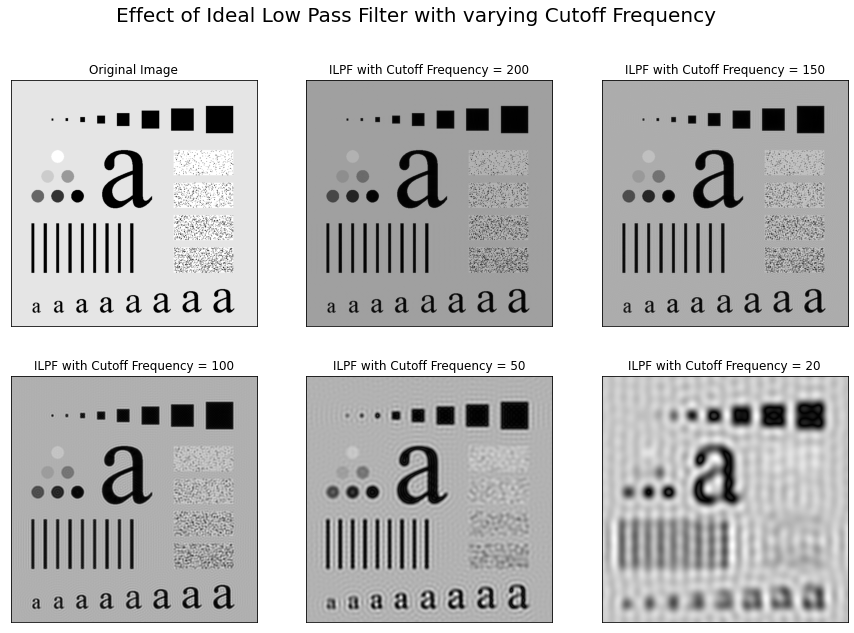

In [11]:
fig, ax = plt.subplots(2,3, figsize=(15,10))

ax[0][0].imshow(img_array, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Original Image')

ax[0][1].imshow(low_ideal_img_1, cmap = 'gray')
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('ILPF with Cutoff Frequency = 200')

ax[0][2].imshow(low_ideal_img_2, cmap = 'gray')
ax[0][2].xaxis.set_ticks([])
ax[0][2].yaxis.set_ticks([])
ax[0][2].title.set_text('ILPF with Cutoff Frequency = 150')

ax[1][0].imshow(low_ideal_img_3, cmap = 'gray')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('ILPF with Cutoff Frequency = 100')

ax[1][1].imshow(low_ideal_img_4, cmap = 'gray')
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('ILPF with Cutoff Frequency = 50')

ax[1][2].imshow(low_ideal_img_5, cmap = 'gray')
ax[1][2].xaxis.set_ticks([])
ax[1][2].yaxis.set_ticks([])
ax[1][2].title.set_text('ILPF with Cutoff Frequency = 20')

fig.suptitle('Effect of Ideal Low Pass Filter with varying Cutoff Frequency', fontsize=20)
plt.show()

**Explanation:** Decreasing the cutoff frequency increases the blurring but also creates ringing effect. The blurring occurs because if we decrease the cut-off frequency, we let lesser amount of higher frequencies to pass and lose more of the edge information as higher frequencies contain edge information. The ringing effect occurs because the spatial representation of an ideal low pass filter is a sinc function, and the sinc function creates these annoying ripples when convolved in spatial domain. Thus, the frequency domain version of the sinc function which is the ideal filter will create the same ringing effect. If we compare the outputs with the original image, we can also see a slight change in color - the offwhite background is changed to a greyish color.

In [12]:
butter_low_img_1 = freq_dom_filter(img_array, cut_off_freq = 150, order = 2, mode = 'lb')
butter_low_img_2 = freq_dom_filter(img_array, cut_off_freq = 50, order = 2, mode = 'lb')
butter_low_img_3 = freq_dom_filter(img_array, cut_off_freq = 20, order = 2, mode = 'lb')

butter_low_img_4 = freq_dom_filter(img_array, cut_off_freq = 150, order = 4, mode = 'lb')
butter_low_img_5 = freq_dom_filter(img_array, cut_off_freq = 50, order = 4, mode = 'lb')
butter_low_img_6 = freq_dom_filter(img_array, cut_off_freq = 20, order = 4, mode = 'lb')

butter_low_img_7 = freq_dom_filter(img_array, cut_off_freq = 150, order = 16, mode = 'lb')
butter_low_img_8 = freq_dom_filter(img_array, cut_off_freq = 50, order = 16, mode = 'lb')
butter_low_img_9 = freq_dom_filter(img_array, cut_off_freq = 20, order = 16, mode = 'lb')

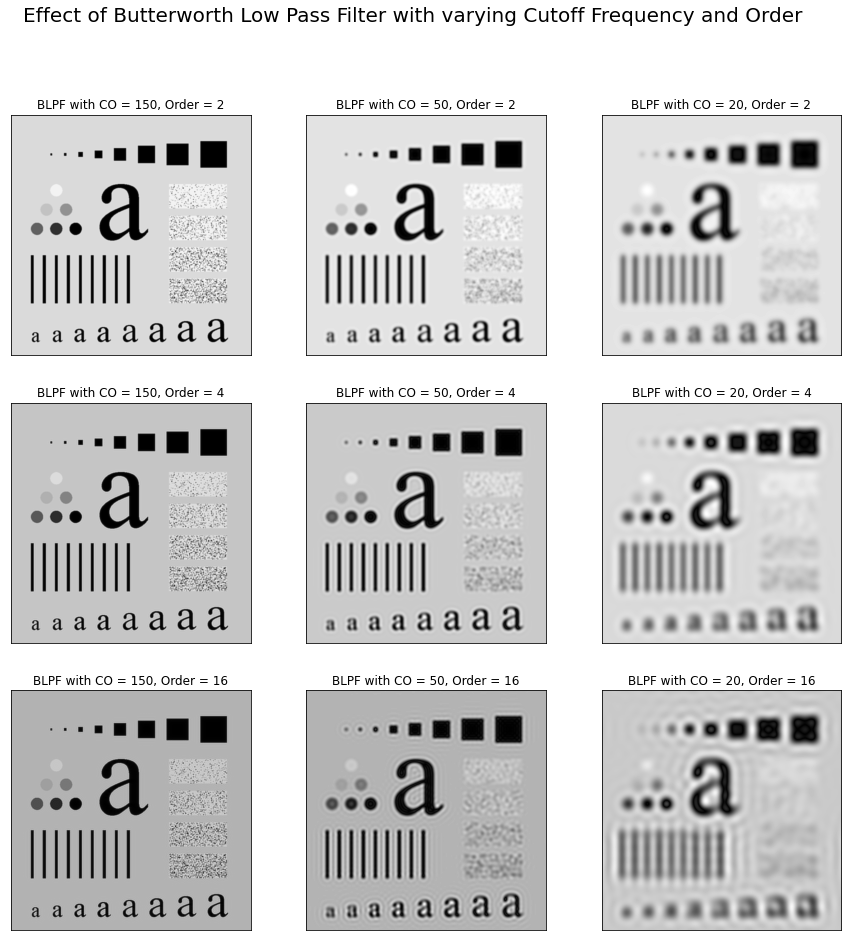

In [13]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

ax[0][0].imshow(butter_low_img_1, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('BLPF with CO = 150, Order = 2')

ax[0][1].imshow(butter_low_img_2, cmap = 'gray')
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('BLPF with CO = 50, Order = 2')

ax[0][2].imshow(butter_low_img_3, cmap = 'gray')
ax[0][2].xaxis.set_ticks([])
ax[0][2].yaxis.set_ticks([])
ax[0][2].title.set_text('BLPF with CO = 20, Order = 2')

ax[1][0].imshow(butter_low_img_4, cmap = 'gray')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('BLPF with CO = 150, Order = 4')

ax[1][1].imshow(butter_low_img_5, cmap = 'gray')
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('BLPF with CO = 50, Order = 4')

ax[1][2].imshow(butter_low_img_6, cmap = 'gray')
ax[1][2].xaxis.set_ticks([])
ax[1][2].yaxis.set_ticks([])
ax[1][2].title.set_text('BLPF with CO = 20, Order = 4')

ax[2][0].imshow(butter_low_img_7, cmap = 'gray')
ax[2][0].xaxis.set_ticks([])
ax[2][0].yaxis.set_ticks([])
ax[2][0].title.set_text('BLPF with CO = 150, Order = 16')

ax[2][1].imshow(butter_low_img_8, cmap = 'gray')
ax[2][1].xaxis.set_ticks([])
ax[2][1].yaxis.set_ticks([])
ax[2][1].title.set_text('BLPF with CO = 50, Order = 16')

ax[2][2].imshow(butter_low_img_9, cmap = 'gray')
ax[2][2].xaxis.set_ticks([])
ax[2][2].yaxis.set_ticks([])
ax[2][2].title.set_text('BLPF with CO = 20, Order = 16')

fig.suptitle('Effect of Butterworth Low Pass Filter with varying Cutoff Frequency and Order', fontsize=20)
plt.show()

**Explanation:** The butterworth filter can be seen to have different effects with varying cutoff frequency and order. By decreasing the cut-off frequency, the blurring increases and so does the ringing effect. But the ringing effect is much lesser than the ideal filter. However, increasing the order makes this filter behave more like the ideal filter. If we look at the lower outputs which has an order of 16, the background color of offwhite gets changed to a grey-ish color and this effect is similar to the outputs of the ideal filter. Again, visible ringing effect is seen at the last output with a high order and low cut-off frequency of 20 and this output is similar to the output of ideal filter with a low cut-off frequency of 20.

In [22]:
guass_low_img_1 = freq_dom_filter(img_array, cut_off_freq = 200, mode = 'lg')
guass_low_img_2 = freq_dom_filter(img_array, cut_off_freq = 150, mode = 'lg')
guass_low_img_3 = freq_dom_filter(img_array, cut_off_freq = 100, mode = 'lg')
guass_low_img_4 = freq_dom_filter(img_array, cut_off_freq = 50, mode = 'lg')
guass_low_img_5 = freq_dom_filter(img_array, cut_off_freq = 20, mode = 'lg')

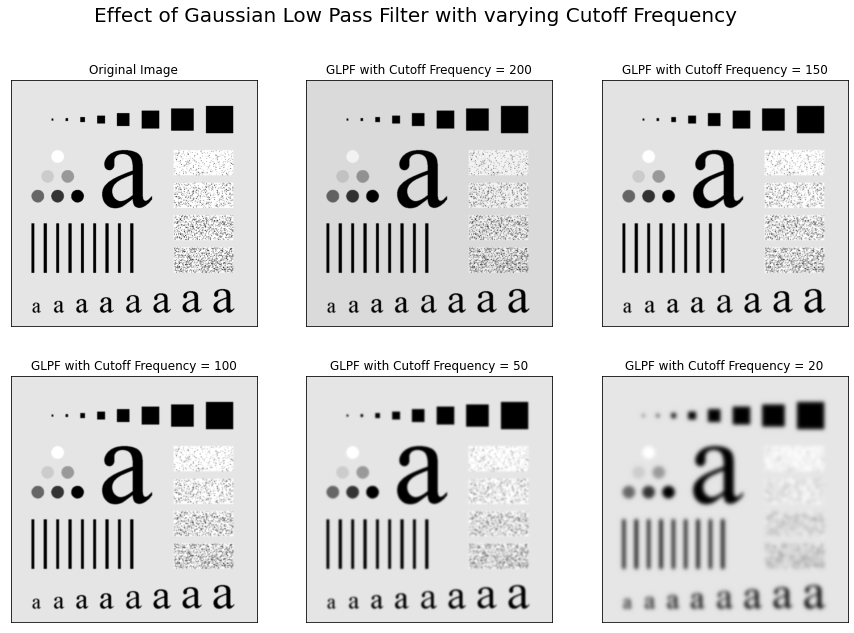

In [23]:
fig, ax = plt.subplots(2,3, figsize=(15,10))

ax[0][0].imshow(img_array, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Original Image')

ax[0][1].imshow(guass_low_img_1, cmap = 'gray')
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('GLPF with Cutoff Frequency = 200')

ax[0][2].imshow(guass_low_img_2, cmap = 'gray')
ax[0][2].xaxis.set_ticks([])
ax[0][2].yaxis.set_ticks([])
ax[0][2].title.set_text('GLPF with Cutoff Frequency = 150')

ax[1][0].imshow(guass_low_img_3, cmap = 'gray')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('GLPF with Cutoff Frequency = 100')

ax[1][1].imshow(guass_low_img_4, cmap = 'gray')
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('GLPF with Cutoff Frequency = 50')

ax[1][2].imshow(guass_low_img_5, cmap = 'gray')
ax[1][2].xaxis.set_ticks([])
ax[1][2].yaxis.set_ticks([])
ax[1][2].title.set_text('GLPF with Cutoff Frequency = 20')

fig.suptitle('Effect of Gaussian Low Pass Filter with varying Cutoff Frequency', fontsize=20)
plt.show()

**Explnation:** The Gaussian Low Pass Filter seems to have the least ringing effect even at cut-off frequency of 20. Similar to Ideal, and Butterworth, changing the cut-off frequency increases the blurring. With no `order` like parameter to tune, GLPF is less flexible than BLPF but more convinient to use.

In [24]:
ideal_high_img_1 = freq_dom_filter(img_array, cut_off_freq = 200, mode = 'hi')
ideal_high_img_2 = freq_dom_filter(img_array, cut_off_freq = 150, mode = 'hi')
ideal_high_img_3 = freq_dom_filter(img_array, cut_off_freq = 100, mode = 'hi')
ideal_high_img_4 = freq_dom_filter(img_array, cut_off_freq = 50, mode = 'hi')
ideal_high_img_5 = freq_dom_filter(img_array, cut_off_freq = 20, mode = 'hi')

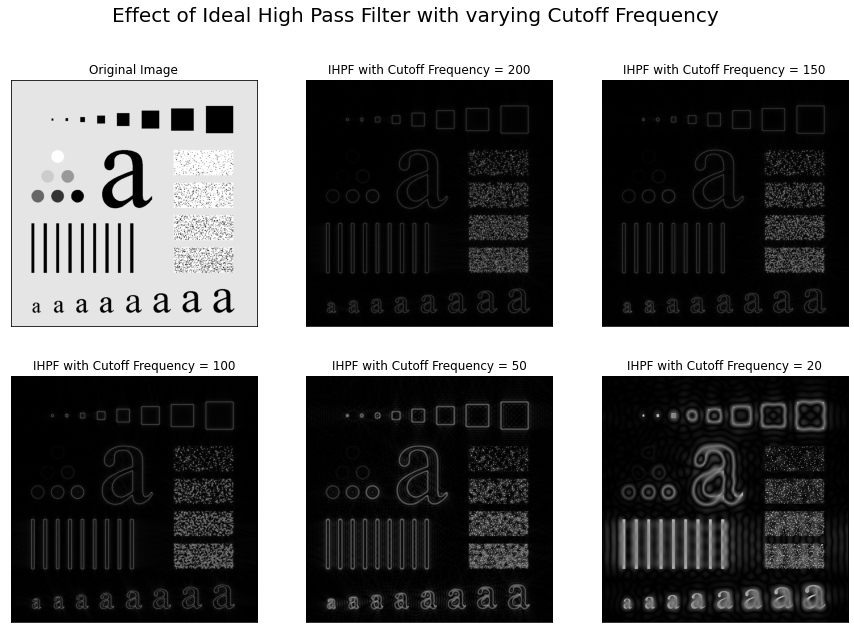

In [25]:
fig, ax = plt.subplots(2,3, figsize=(15,10))

ax[0][0].imshow(img_array, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Original Image')

ax[0][1].imshow(ideal_high_img_1, cmap = 'gray')
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('IHPF with Cutoff Frequency = 200')

ax[0][2].imshow(ideal_high_img_2, cmap = 'gray')
ax[0][2].xaxis.set_ticks([])
ax[0][2].yaxis.set_ticks([])
ax[0][2].title.set_text('IHPF with Cutoff Frequency = 150')

ax[1][0].imshow(ideal_high_img_3, cmap = 'gray')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('IHPF with Cutoff Frequency = 100')

ax[1][1].imshow(ideal_high_img_4, cmap = 'gray')
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('IHPF with Cutoff Frequency = 50')

ax[1][2].imshow(ideal_high_img_5, cmap = 'gray')
ax[1][2].xaxis.set_ticks([])
ax[1][2].yaxis.set_ticks([])
ax[1][2].title.set_text('IHPF with Cutoff Frequency = 20')

fig.suptitle('Effect of Ideal High Pass Filter with varying Cutoff Frequency', fontsize=20)
plt.show()

**Explanation:** High Pass Filters only let the higher frequencies pass and hence, the output is the edges only as the higher frequencies contain edge information. Reducing the cutoff frequencies result in more lower frequencies to pass, thus giving us more detailed edges along with some information of the texture as the lower frequencies contain the textural information. Decreasing the radius even further will give us more textural information and the filter will behave more like a notch filter. However, the ringing effect also increases since it's the ideal filter and it's spatial representation is similar to a signal with an impulse added to a negative sinc function. Convolving with sinc function creates ringing effects, and hence, elementwise multiplication with the ideal high pass filter will also create ringing effects at lower cutoff frequencies similar to its low pass counterpart.

In [18]:
butter_high_img_1 = freq_dom_filter(img_array, cut_off_freq = 150, order = 2, mode = 'hb')
butter_high_img_2 = freq_dom_filter(img_array, cut_off_freq = 50, order = 2, mode = 'hb')
butter_high_img_3 = freq_dom_filter(img_array, cut_off_freq = 20, order = 2, mode = 'hb')

butter_high_img_4 = freq_dom_filter(img_array, cut_off_freq = 150, order = 4, mode = 'hb')
butter_high_img_5 = freq_dom_filter(img_array, cut_off_freq = 50, order = 4, mode = 'hb')
butter_high_img_6 = freq_dom_filter(img_array, cut_off_freq = 20, order = 4, mode = 'hb')

butter_high_img_7 = freq_dom_filter(img_array, cut_off_freq = 150, order = 8, mode = 'hb')
butter_high_img_8 = freq_dom_filter(img_array, cut_off_freq = 50, order = 8, mode = 'hb')
butter_high_img_9 = freq_dom_filter(img_array, cut_off_freq = 20, order = 8, mode = 'hb')

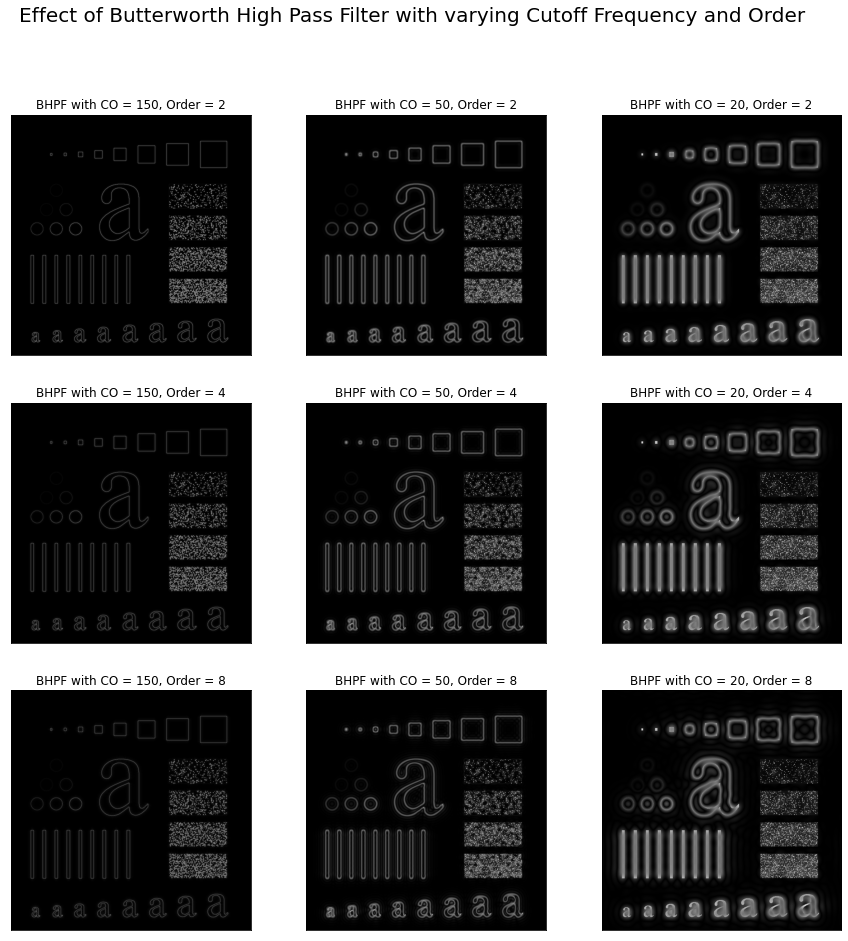

In [19]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

ax[0][0].imshow(butter_high_img_1, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('BHPF with CO = 150, Order = 2')

ax[0][1].imshow(butter_high_img_2, cmap = 'gray')
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('BHPF with CO = 50, Order = 2')

ax[0][2].imshow(butter_high_img_3, cmap = 'gray')
ax[0][2].xaxis.set_ticks([])
ax[0][2].yaxis.set_ticks([])
ax[0][2].title.set_text('BHPF with CO = 20, Order = 2')

ax[1][0].imshow(butter_high_img_4, cmap = 'gray')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('BHPF with CO = 150, Order = 4')

ax[1][1].imshow(butter_high_img_5, cmap = 'gray')
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('BHPF with CO = 50, Order = 4')

ax[1][2].imshow(butter_high_img_6, cmap = 'gray')
ax[1][2].xaxis.set_ticks([])
ax[1][2].yaxis.set_ticks([])
ax[1][2].title.set_text('BHPF with CO = 20, Order = 4')

ax[2][0].imshow(butter_high_img_7, cmap = 'gray')
ax[2][0].xaxis.set_ticks([])
ax[2][0].yaxis.set_ticks([])
ax[2][0].title.set_text('BHPF with CO = 150, Order = 8')

ax[2][1].imshow(butter_high_img_8, cmap = 'gray')
ax[2][1].xaxis.set_ticks([])
ax[2][1].yaxis.set_ticks([])
ax[2][1].title.set_text('BHPF with CO = 50, Order = 8')

ax[2][2].imshow(butter_high_img_9, cmap = 'gray')
ax[2][2].xaxis.set_ticks([])
ax[2][2].yaxis.set_ticks([])
ax[2][2].title.set_text('BHPF with CO = 20, Order = 8')

fig.suptitle('Effect of Butterworth High Pass Filter with varying Cutoff Frequency and Order', fontsize=20)
plt.show()

**Explanation:** Similar to the BLPF, the changes in Butterworth High Pass Filter (BHPF) can be seen at varying cut-off frequency and order. Increasing the order makes it work similar to an ideal filter with more ringing effect. Decreasing cut-off frequency increases blurring and ringing effect. At lower order, BHPF has less ringing effect than IHPF at same cut-off frequencies. The transition from higher frequency to lower ones isn't as sharp as IHPF; it is a rather slow transition that can be controlled by tuning the order parameter.

In [20]:
guass_high_img_1 = freq_dom_filter(img_array, cut_off_freq = 200, mode = 'hg')
guass_high_img_2 = freq_dom_filter(img_array, cut_off_freq = 150, mode = 'hg')
guass_high_img_3 = freq_dom_filter(img_array, cut_off_freq = 100, mode = 'hg')
guass_high_img_4 = freq_dom_filter(img_array, cut_off_freq = 50, mode = 'hg')
guass_high_img_5 = freq_dom_filter(img_array, cut_off_freq = 20, mode = 'hg')

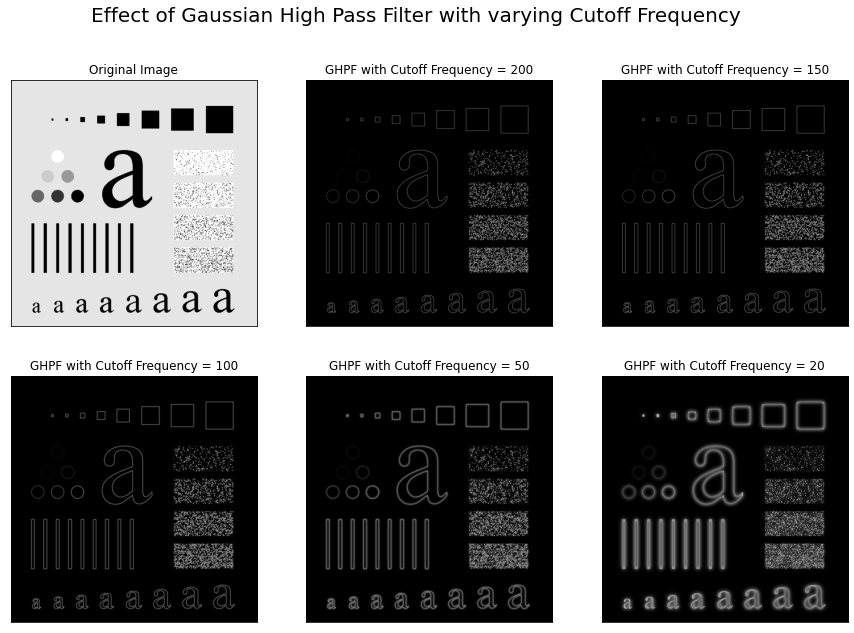

In [21]:
fig, ax = plt.subplots(2,3, figsize=(15,10))

ax[0][0].imshow(img_array, cmap = 'gray')
ax[0][0].xaxis.set_ticks([])
ax[0][0].yaxis.set_ticks([])
ax[0][0].title.set_text('Original Image')

ax[0][1].imshow(guass_high_img_1, cmap = 'gray')
ax[0][1].xaxis.set_ticks([])
ax[0][1].yaxis.set_ticks([])
ax[0][1].title.set_text('GHPF with Cutoff Frequency = 200')

ax[0][2].imshow(guass_high_img_2, cmap = 'gray')
ax[0][2].xaxis.set_ticks([])
ax[0][2].yaxis.set_ticks([])
ax[0][2].title.set_text('GHPF with Cutoff Frequency = 150')

ax[1][0].imshow(guass_high_img_3, cmap = 'gray')
ax[1][0].xaxis.set_ticks([])
ax[1][0].yaxis.set_ticks([])
ax[1][0].title.set_text('GHPF with Cutoff Frequency = 100')

ax[1][1].imshow(guass_high_img_4, cmap = 'gray')
ax[1][1].xaxis.set_ticks([])
ax[1][1].yaxis.set_ticks([])
ax[1][1].title.set_text('GHPF with Cutoff Frequency = 50')

ax[1][2].imshow(guass_high_img_5, cmap = 'gray')
ax[1][2].xaxis.set_ticks([])
ax[1][2].yaxis.set_ticks([])
ax[1][2].title.set_text('GHPF with Cutoff Frequency = 20')

fig.suptitle('Effect of Gaussian High Pass Filter with varying Cutoff Frequency', fontsize=20)
plt.show()

**Explanation:** GHPF has the least ringing effect among the filters similar to GLPF. Increasing cut-off frequencies allow more lower frequencies to pass, and thus giving us more texture and intensity to our edges. At higher frequencies almost nothing is seen as only the most prominent edges are passed by the GHPF. GHPF has no parameter to tune unlike its Butterworth counterpart, and hence, is less flexible but more convenient to use.